# Viscoelastic wave propagator with Kelvin-Voigt formulation

This tutorial was prepared by Paula Neves de Araujo (paulan@ime.usp.br).

This tutorial is an introduction to the isotropic viscoelastic wave propagator of Spyro using the Kelvin-Voigt formulation. The tutorial is an adaption of the elastic forward notebook.

First, the notebook environment is configured and the required modules are imported. If you are running this notebook in Google colab, please copy the following code into a code block before running the notebook:

```python
# For use in colab only:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

!pip install git+https://github.com/NDF-Poli-USP/spyro.git

In [1]:
%matplotlib inline
import spyro
import numpy as np

from firedrake import *

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


In [2]:
dictionary = {
    "options": {
        "cell_type": "Q",
        "variant": "lumped",
        "degree": 4,
        "dimension": 2,
    },
    "parallelism": {
        "type": "automatic",
    },
    "mesh": {
        "Lz": 1.0,
        "Lx": 1.0,
        "mesh_file": None,
        "mesh_type": "firedrake_mesh",
    },
    "acquisition": {
        "source_type": "ricker",
        "source_locations": [(-0.5, 0.5)],
        "frequency": 5.0,
        "delay": 0.2,
        "delay_type": "time",
        "receiver_locations": spyro.create_transect((-1.9, 1.2), (-1.9, 1.8), 300),
    },
    "time_axis": {
        "initial_time": 0.0,
        "final_time": 0.5,
        "dt": 0.00005,
        "output_frequency": 100,
        "gradient_sampling_frequency": 1,
    },
    "visualization": {
        "forward_output": True,
        "forward_output_filename": "results/forward_output.pvd",
        "fwi_velocity_model_output": False,
        "velocity_model_filename": None,
        "gradient_output": False,
        "gradient_filename": "results/Gradient.pvd",
        "adjoint_output": False,
        "adjoint_filename": None,
        "debug_output": False,
    },
    "viscoelasticity": {
        "viscoelastic": True,
        "visco_type": 'kelvin_voigt',
        "eta": 10**(-4),
    },
}

dictionary["synthetic_data"] = {
    "type": "object",
    "density": 0.1,
    "p_wave_velocity": 1.5,
    "s_wave_velocity": 1.0,
    "real_velocity_file": None,
}

dictionary["acquisition"]["amplitude"] = np.array([0, 1])


Note that "viscoelastic" is set to **True**. If this parameter is set to **False**, the elastic wave propagation is performed. We also have the "visco_type" parameter which is used to define the model to be adopted. Three options are implemented for now: 'kelvin-voigt', 'zener' and 'gsls'. In this notebook, we only address the Kelvin-Voigt formulation, and this is why the parameter "eta" is defined. This is the viscoelasticity constant for the Kelvin-Voigt model, which describes the viscoelastic behavior of materials by combining a purely elastic spring and a purely viscous dashpot in **parallel**.

In this configuration, the total stress is the sum of the elastic and viscous components:

$$
\sigma = \lambda \, \text{tr}(\varepsilon) \, I + 2\mu \, \varepsilon + \eta \, \dot{\varepsilon}
$$

where:

- $\sigma$ is the stress tensor  
- $\varepsilon$ is the strain tensor  
- $\dot{\varepsilon}$ is the strain rate  
- $\lambda$ and $\mu$ are the Lamé parameters (elastic moduli)  
- $\eta$ is the viscosity coefficient  
- $I$ is the identity tensor  
- $\text{tr}(\varepsilon)$ is the trace of the strain tensor  

This model captures time-dependent behavior under loading and is commonly used to simulate wave attenuation and dispersion in viscoelastic media.

In the following, we build the "wave" object, which is an instance of "wave" type, and also stablish a periodic mesh for the example:

In [3]:
wave = spyro.IsotropicWave(dictionary)

wave.set_mesh(mesh_parameters={"dx": 0.025, "periodic": True})

Parallelism type: automatic


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/io/model_parameters.py:579: UserWarning: No velocity model set initially. If using user defined conditional or expression, please input it in the Wave object.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/solvers/wave.py:84: UserWarning: No mesh file, Firedrake mesh will be automatically generated.
  warnings.warn(


Finally, the wave propagation can be performed:

In [4]:
wave.forward_solve()

Viscoelastic Kelvin–Voigt
Saving Displacement in: results/forward_outputsn0.pvd


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(


Simulation time is:        0.0 seconds
Simulation time is:      0.005 seconds
Simulation time is:       0.01 seconds
Simulation time is:      0.015 seconds
Simulation time is:       0.02 seconds
Simulation time is:      0.025 seconds
Simulation time is:       0.03 seconds
Simulation time is:      0.035 seconds
Simulation time is:       0.04 seconds
Simulation time is:      0.045 seconds
Simulation time is:       0.05 seconds
Simulation time is:      0.055 seconds
Simulation time is:       0.06 seconds
Simulation time is:      0.065 seconds
Simulation time is:       0.07 seconds
Simulation time is:      0.075 seconds
Simulation time is:       0.08 seconds
Simulation time is:      0.085 seconds
Simulation time is:       0.09 seconds
Simulation time is:      0.095 seconds
Simulation time is:        0.1 seconds
Simulation time is:      0.105 seconds
Simulation time is:       0.11 seconds
Simulation time is:      0.115 seconds
Simulation time is:       0.12 seconds
Simulation time is:      

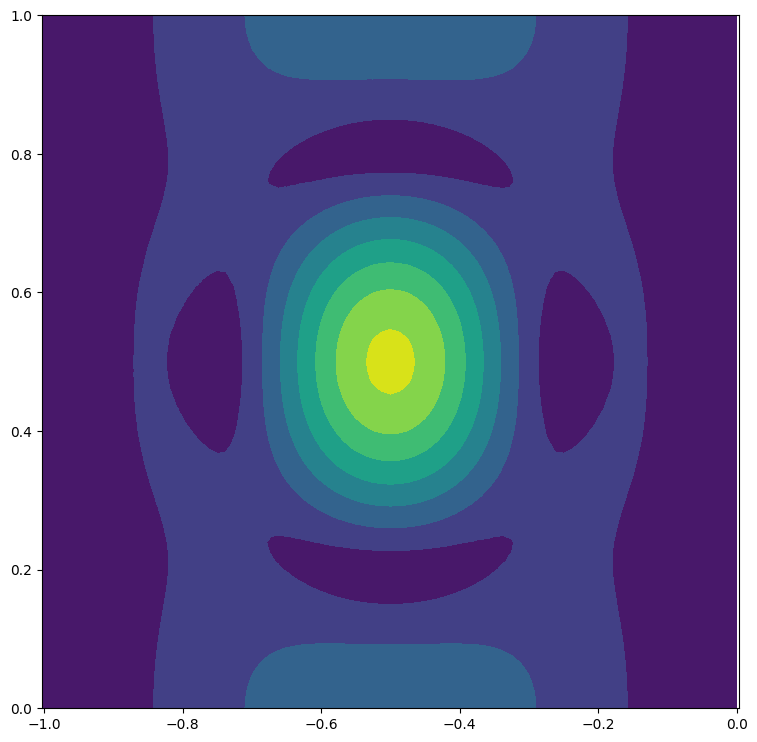

In [5]:
spyro.plots.plot_function(wave.u_n)

In the following, we show that, for $\eta = 0.0$ the results coincide with the elastic case. We redefine the parameters dictionary and set "viscoelastic" as **False**:

In [6]:
dictionary = {
    "options": {
        "cell_type": "Q",
        "variant": "lumped",
        "degree": 4,
        "dimension": 2,
    },
    "parallelism": {
        "type": "automatic",
    },
    "mesh": {
        "Lz": 1.0,
        "Lx": 1.0,
        "mesh_file": None,
        "mesh_type": "firedrake_mesh",
    },
    "acquisition": {
        "source_type": "ricker",
        "source_locations": [(-0.5, 0.5)],
        "frequency": 5.0,
        "delay": 0.2,
        "delay_type": "time",
        "receiver_locations": spyro.create_transect((-1.9, 1.2), (-1.9, 1.8), 300),
    },
    "time_axis": {
        "initial_time": 0.0,
        "final_time": 0.5,
        "dt": 0.00005,
        "output_frequency": 100,
        "gradient_sampling_frequency": 1,
    },
    "visualization": {
        "forward_output": True,
        "forward_output_filename": "results/forward_output.pvd",
        "fwi_velocity_model_output": False,
        "velocity_model_filename": None,
        "gradient_output": False,
        "gradient_filename": "results/Gradient.pvd",
        "adjoint_output": False,
        "adjoint_filename": None,
        "debug_output": False,
    },
    "viscoelasticity": {
        "viscoelastic": False,
        "visco_type": 'kelvin_voigt',
        "eta": 0.0,
    },
}

dictionary["synthetic_data"] = {
    "type": "object",
    "density": 0.1,
    "p_wave_velocity": 1.5,
    "s_wave_velocity": 1.0,
    "real_velocity_file": None,
}

dictionary["acquisition"]["amplitude"] = np.array([0, 1])

Then we run the commands for the wave construction and propagation:

In [7]:
wave = spyro.IsotropicWave(dictionary)

wave.set_mesh(mesh_parameters={"dx": 0.025, "periodic": True})

wave.forward_solve()

Parallelism type: automatic


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/io/model_parameters.py:579: UserWarning: No velocity model set initially. If using user defined conditional or expression, please input it in the Wave object.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/solvers/wave.py:84: UserWarning: No mesh file, Firedrake mesh will be automatically generated.
  warnings.warn(


Isotropic elastic
Saving Displacement in: results/forward_outputsn0.pvd


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(


Simulation time is:        0.0 seconds
Simulation time is:      0.005 seconds
Simulation time is:       0.01 seconds
Simulation time is:      0.015 seconds
Simulation time is:       0.02 seconds
Simulation time is:      0.025 seconds
Simulation time is:       0.03 seconds
Simulation time is:      0.035 seconds
Simulation time is:       0.04 seconds
Simulation time is:      0.045 seconds
Simulation time is:       0.05 seconds
Simulation time is:      0.055 seconds
Simulation time is:       0.06 seconds
Simulation time is:      0.065 seconds
Simulation time is:       0.07 seconds
Simulation time is:      0.075 seconds
Simulation time is:       0.08 seconds
Simulation time is:      0.085 seconds
Simulation time is:       0.09 seconds
Simulation time is:      0.095 seconds
Simulation time is:        0.1 seconds
Simulation time is:      0.105 seconds
Simulation time is:       0.11 seconds
Simulation time is:      0.115 seconds
Simulation time is:       0.12 seconds
Simulation time is:      

We obtain the following result:

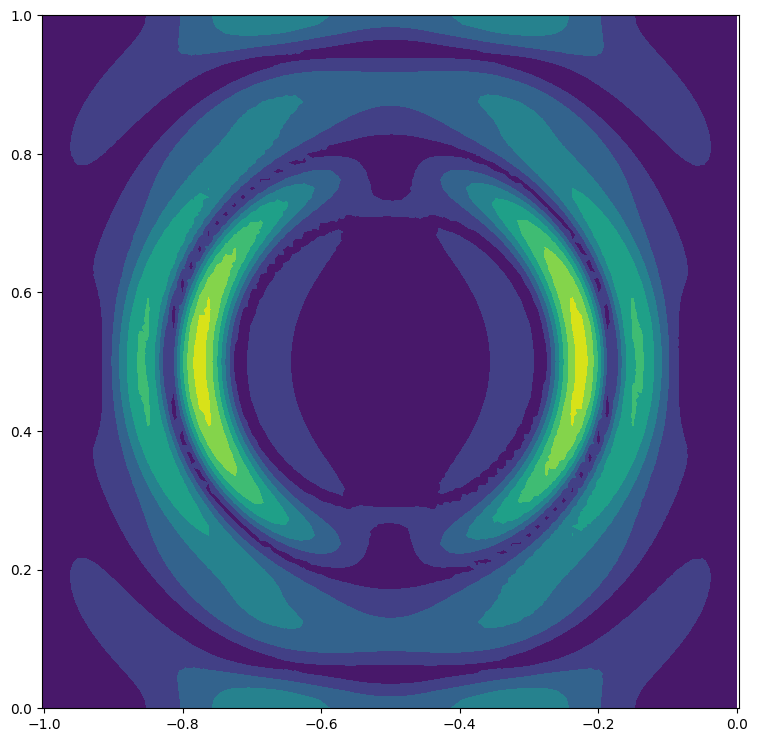

In [8]:
spyro.plots.plot_function(wave.u_n)

Finally, we run the same code for the viscoelastic Kelvin-Voigt model with $\eta=0.0:$

In [11]:
dictionary = {
    "options": {
        "cell_type": "Q",
        "variant": "lumped",
        "degree": 4,
        "dimension": 2,
    },
    "parallelism": {
        "type": "automatic",
    },
    "mesh": {
        "Lz": 1.0,
        "Lx": 1.0,
        "mesh_file": None,
        "mesh_type": "firedrake_mesh",
    },
    "acquisition": {
        "source_type": "ricker",
        "source_locations": [(-0.5, 0.5)],
        "frequency": 5.0,
        "delay": 0.2,
        "delay_type": "time",
        "receiver_locations": spyro.create_transect((-1.9, 1.2), (-1.9, 1.8), 300),
    },
    "time_axis": {
        "initial_time": 0.0,
        "final_time": 0.5,
        "dt": 0.00005,
        "output_frequency": 100,
        "gradient_sampling_frequency": 1,
    },
    "visualization": {
        "forward_output": True,
        "forward_output_filename": "results/forward_output.pvd",
        "fwi_velocity_model_output": False,
        "velocity_model_filename": None,
        "gradient_output": False,
        "gradient_filename": "results/Gradient.pvd",
        "adjoint_output": False,
        "adjoint_filename": None,
        "debug_output": False,
    },
    "viscoelasticity": {
        "viscoelastic": True,
        "visco_type": 'kelvin_voigt',
        "eta": 0.0,
    },
}

dictionary["synthetic_data"] = {
    "type": "object",
    "density": 0.1,
    "p_wave_velocity": 1.5,
    "s_wave_velocity": 1.0,
    "real_velocity_file": None,
}

dictionary["acquisition"]["amplitude"] = np.array([0, 1])

In [12]:
wave = spyro.IsotropicWave(dictionary)

wave.set_mesh(mesh_parameters={"dx": 0.025, "periodic": True})

wave.forward_solve()

Parallelism type: automatic


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/io/model_parameters.py:579: UserWarning: No velocity model set initially. If using user defined conditional or expression, please input it in the Wave object.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/solvers/wave.py:84: UserWarning: No mesh file, Firedrake mesh will be automatically generated.
  warnings.warn(


Viscoelastic Kelvin–Voigt
Saving Displacement in: results/forward_outputsn0.pvd


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(


Simulation time is:        0.0 seconds
Simulation time is:      0.005 seconds
Simulation time is:       0.01 seconds
Simulation time is:      0.015 seconds
Simulation time is:       0.02 seconds
Simulation time is:      0.025 seconds
Simulation time is:       0.03 seconds
Simulation time is:      0.035 seconds
Simulation time is:       0.04 seconds
Simulation time is:      0.045 seconds
Simulation time is:       0.05 seconds
Simulation time is:      0.055 seconds
Simulation time is:       0.06 seconds
Simulation time is:      0.065 seconds
Simulation time is:       0.07 seconds
Simulation time is:      0.075 seconds
Simulation time is:       0.08 seconds
Simulation time is:      0.085 seconds
Simulation time is:       0.09 seconds
Simulation time is:      0.095 seconds
Simulation time is:        0.1 seconds
Simulation time is:      0.105 seconds
Simulation time is:       0.11 seconds
Simulation time is:      0.115 seconds
Simulation time is:       0.12 seconds
Simulation time is:      

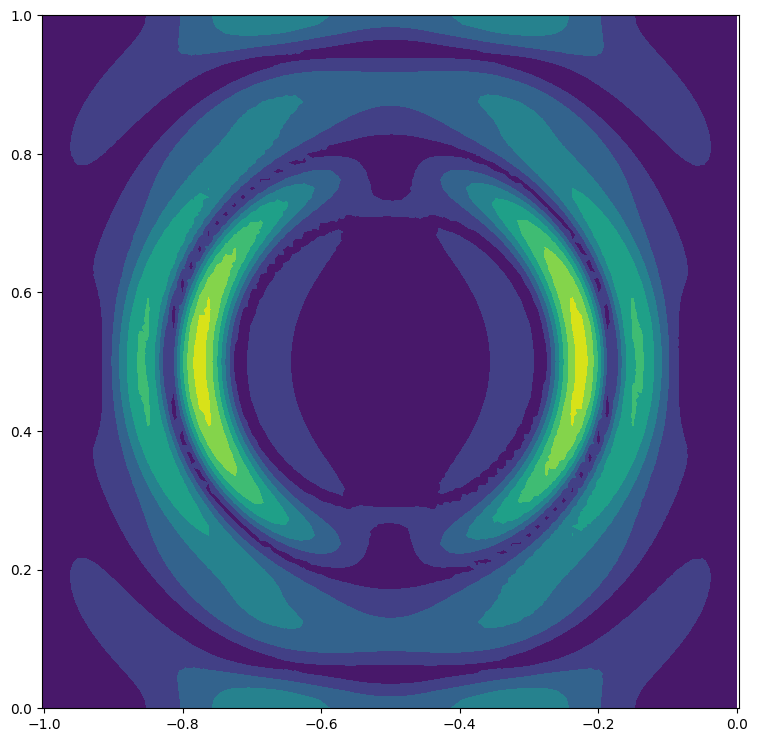

In [13]:
spyro.plots.plot_function(wave.u_n)

We can also compare the results obtained for different values of $\eta.$ Let us redefine $\eta=10^{-8}:$

In [15]:
dictionary["viscoelasticity"]["eta"]= 10**(-8)

Then we run the results for the new dictionary:

In [16]:
wave = spyro.IsotropicWave(dictionary)

wave.set_mesh(mesh_parameters={"dx": 0.025, "periodic": True})

wave.forward_solve()

Parallelism type: automatic


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/io/model_parameters.py:579: UserWarning: No velocity model set initially. If using user defined conditional or expression, please input it in the Wave object.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/solvers/wave.py:84: UserWarning: No mesh file, Firedrake mesh will be automatically generated.
  warnings.warn(


Viscoelastic Kelvin–Voigt
Saving Displacement in: results/forward_outputsn0.pvd


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(


Simulation time is:        0.0 seconds
Simulation time is:      0.005 seconds
Simulation time is:       0.01 seconds
Simulation time is:      0.015 seconds
Simulation time is:       0.02 seconds
Simulation time is:      0.025 seconds
Simulation time is:       0.03 seconds
Simulation time is:      0.035 seconds
Simulation time is:       0.04 seconds
Simulation time is:      0.045 seconds
Simulation time is:       0.05 seconds
Simulation time is:      0.055 seconds
Simulation time is:       0.06 seconds
Simulation time is:      0.065 seconds
Simulation time is:       0.07 seconds
Simulation time is:      0.075 seconds
Simulation time is:       0.08 seconds
Simulation time is:      0.085 seconds
Simulation time is:       0.09 seconds
Simulation time is:      0.095 seconds
Simulation time is:        0.1 seconds
Simulation time is:      0.105 seconds
Simulation time is:       0.11 seconds
Simulation time is:      0.115 seconds
Simulation time is:       0.12 seconds
Simulation time is:      

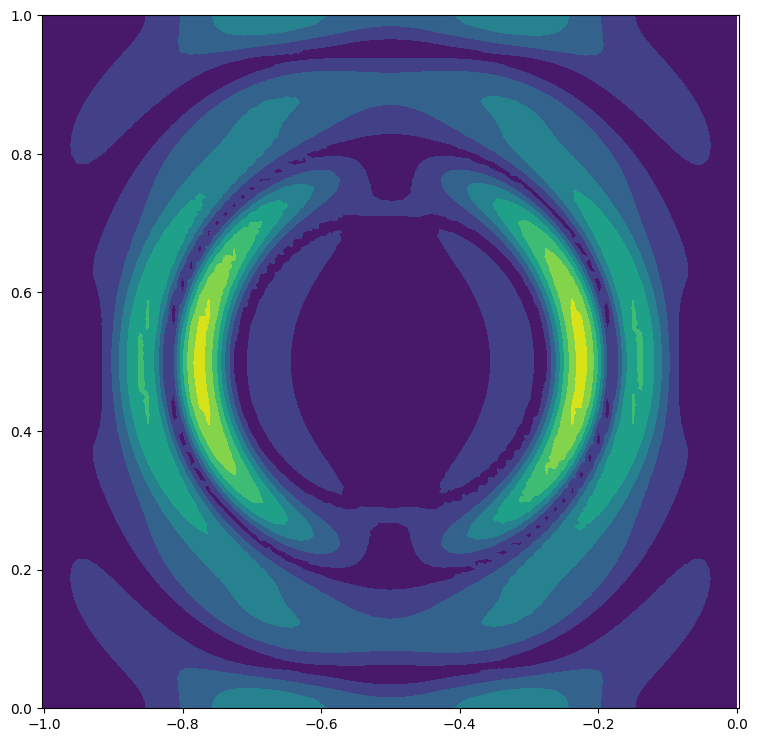

In [17]:
spyro.plots.plot_function(wave.u_n)